Text(0, 0.5, 'Neighborhoods')

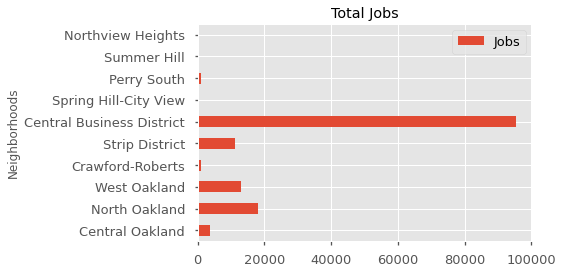

In [25]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("Neighborhoods_with_SNAP_Data.csv", index_col = "Neighborhood_2010_HOOD",parse_dates=True) 
#set neighboorhood column as index

data = data[['Total___Jobs_Located_in_N_hood_','SNAP_All_csv_Commute_to_Work__D']] 
# select only population, total jobs, and job % columns, get rid of other columns
data.dropna() #drop all missing percentages in the commute columns
jobdata = data.drop(columns = 'SNAP_All_csv_Commute_to_Work__D') #drop unwanted columns in list
#jobdata = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending

jobdata.columns = {'Jobs'} #rename columns
 #central business district huge outlier at 90000
jobdata.head(10).plot(kind = 'barh', title = "Total Jobs")
plt.ylabel('Neighborhoods')

This graph is pretty ugly, we should sort it to only see where the most jobs are and get rid of remaining stragglers. We should also get toss the Central Business District outlier, as there won't be much housing there and it will be very pricey anyways.

Text(0, 0.5, 'Neighborhoods')

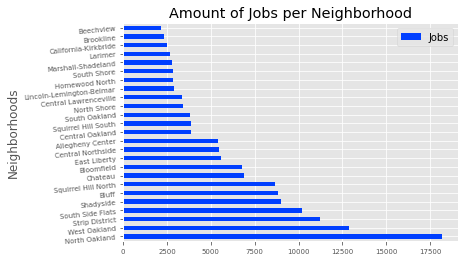

In [14]:
jobdata = data.drop(columns = 'SNAP_All_csv_Commute_to_Work__D')
jobdata = jobdata[jobdata['Total___Jobs_Located_in_N_hood_'] < 80000] # plot everything but business districtcol
jobdata = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending
jobdata.columns = {'Jobs'}
plt.style.use('seaborn-bright')
jobdata.head(25).plot(kind = 'barh', title = "Amount of Jobs per Neighborhood",rot=5,fontsize=7) 
#show only top 25 neighborhoods
plt.ylabel('Neighborhoods')


There are the places with the most job opportunities, let's look at the worst.

Text(0, 0.5, 'Neighborhoods')

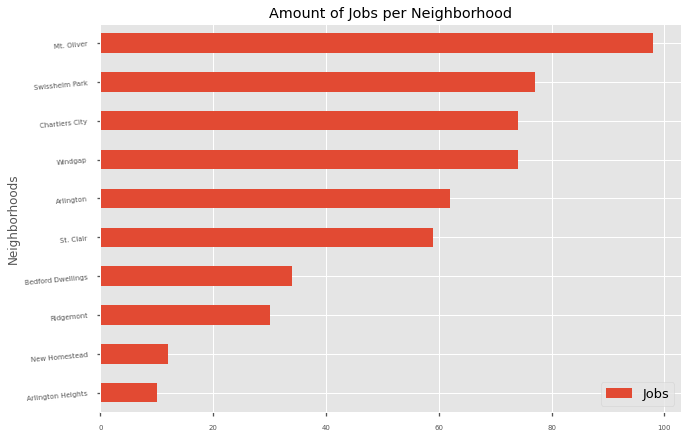

In [24]:
jobdata = data.drop(columns = 'SNAP_All_csv_Commute_to_Work__D')
jobdata = jobdata[jobdata['Total___Jobs_Located_in_N_hood_'] < 80000] 
jobdata2 = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_',ascending = True)
jobdata2.columns = {'Jobs'}
plt.style.use('ggplot')
jobdata2.head(10).plot(kind = 'barh', title = "Amount of Jobs per Neighborhood",rot=5,fontsize=7) 

plt.ylabel('Neighborhoods')

Now we know where all the jobs are, now lets see if we have to drive to these jobs, as in 2018 studies found that the average commute to work takes up to 27 minutes a person's time one way. [1] This works out to around 225 hours a year dedicated to getting to work. If we can work from home, its attractiveness for housing is much higher

[1] https://www.washingtonpost.com/business/2019/10/07/nine-days-road-average-commute-time-reached-new-record-last-year/

<ipython-input-23-db568fbb2bc2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute['SNAP_All_csv_Commute_to_Work__D'] = commute['SNAP_All_csv_Commute_to_Work__D'].str.rstrip('%').astype('float')


Text(0.5, 0, 'Neighborhoods')

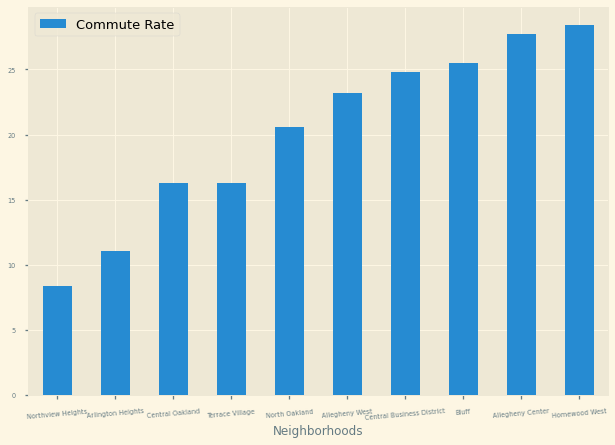

In [23]:
commutedata = pd.read_csv("Neighborhoods_with_SNAP_Data.csv", index_col = "Neighborhood_2010_HOOD",parse_dates=True)#set neighboorhood columns as index

commute = commutedata[['SNAP_All_csv_Commute_to_Work__D']] # select only population, total jobs, and job % columns
commute.dropna()
#commute = data.drop(columns = ['Pop__2010','SNAP_All_csv_Jobs_in__Hood__Con','Total___Jobs_Located_in_N_hood_'])

for row in commute:
    try:
        commute['SNAP_All_csv_Commute_to_Work__D'] = commute['SNAP_All_csv_Commute_to_Work__D'].str.rstrip('%').astype('float')
        #strip away the % from string and convert to float 
    except:
        pass
commute = commute.sort_values(by = 'SNAP_All_csv_Commute_to_Work__D', ascending = True) #get the smallest percentages

plt.style.use('Solarize_Light2')

commute.columns = {'Commute Rate'} #rename columns
commute.head(10).plot(kind = 'bar', rot = 5,fontsize=6.5)
plt.xlabel('Neighborhoods')


  #https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte

We should now compare this data with our graph sorted for most jobs to decide where is most suitable to live.
From an ititial look, we can see that North Oakalnd is clearly dominates in both metrics. In that it has a low amount of people having to commute to work and it has the most jobs out of all neighborhoods in Pittsburgh barring the Central Business District outlier. On the other hand Arlington Heights is the clear loser even though it has the 2nd lowest commute rate. 10 jobs is simply not suffient enough to justify moving there. 